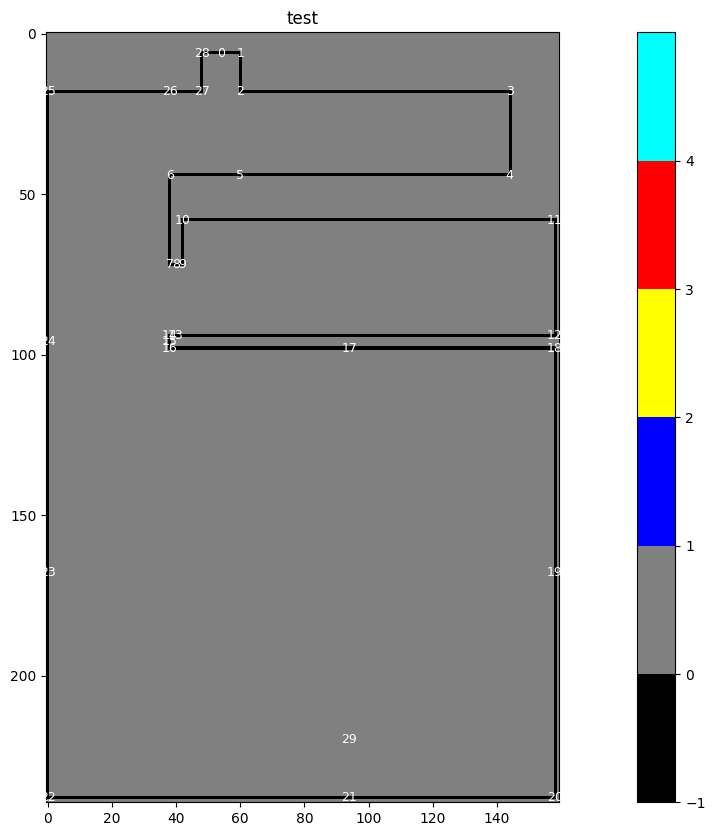

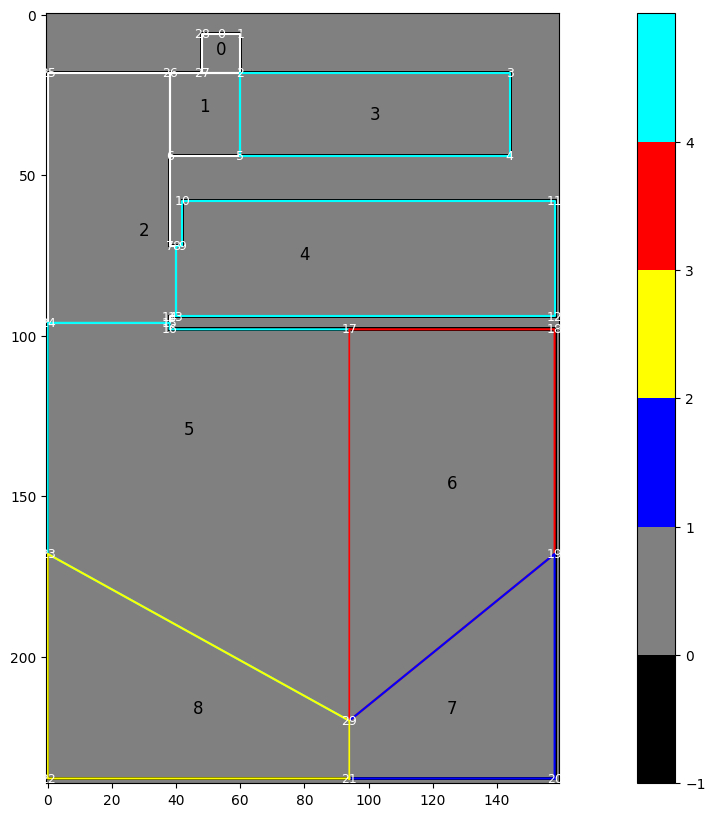

{2: [1, 2]}
{2: [1, 2], 3: [3], 4: [4]}
{2: [1, 2], 4: [3, 4], 5: [5]}
{1: 4, 2: 4, 3: 4, 4: 4, 5: 5}
--- 8 ---
insert 23 -> 24 at 1, color 2 pipe_id 28
insert 24 -> 25 at 0, color 2 pipe_id 29
insert 25 -> 26 at 0, color 2 pipe_id 30
insert 26 -> 27 at 0, color 2 pipe_id 31
insert 27 -> 28 at 0, color 2 pipe_id 32
insert 28 -> 0 at 0, color 2 pipe_id 33
mix 23 {26, 28}
mix 24 {28, 29}
mix 25 {29, 30}
mix 26 {30, 31}
mix 27 {32, 31}
mix 28 {32, 33}
--- 0 ---
--- 1 ---
--- 2 ---
--- 3 ---
insert 2 -> 1 at 0, color 4 pipe_id 34
insert 1 -> 0 at 0, color 4 pipe_id 35
mix 1 {34, 35}
mix 2 {1, 34}
--- 4 ---
insert 8 -> 7 at 0, color 4 pipe_id 36
insert 7 -> 6 at 0, color 4 pipe_id 37
insert 6 -> 5 at 0, color 4 pipe_id 38
mix 1 {34, 35}
mix 2 {2, 34}
mix 5 {2, 38}
mix 6 {37, 38}
mix 7 {36, 37}
mix 8 {8, 36}
--- 5 ---
insert 15 -> 14 at 0, color 4 pipe_id 39
insert 14 -> 13 at 0, color 4 pipe_id 40
mix 1 {34, 35}
mix 2 {2, 34}
mix 5 {2, 38}
mix 6 {37, 38}
mix 7 {36, 37}
mix 8 {9, 36}
mix 13 

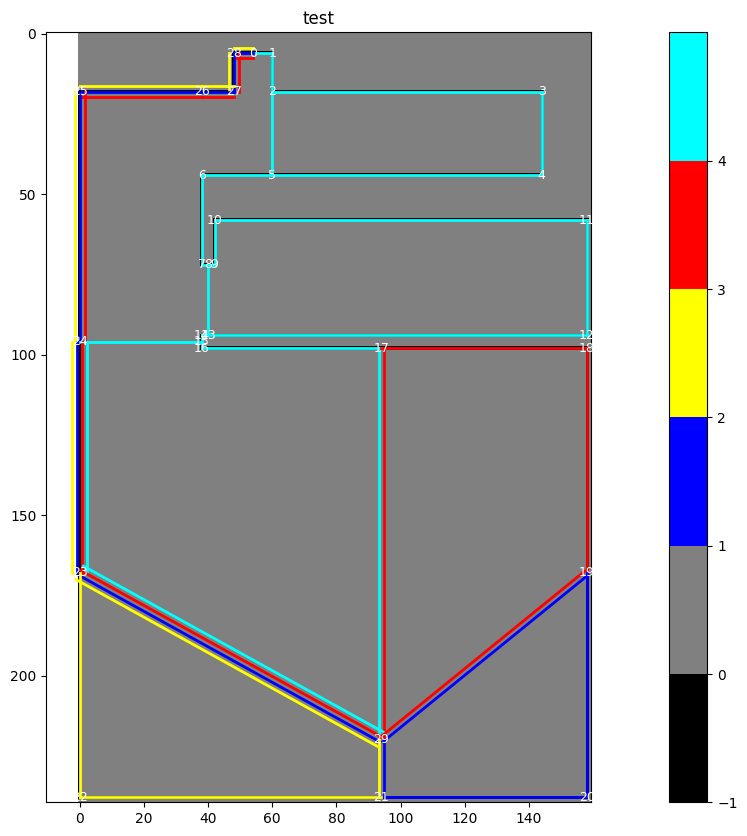

In [2]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

# 1. 加载目标 Notebook
notebook_path = './cactus.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# 2. 执行目标 Notebook 中的代码单元
shell = InteractiveShell.instance()
for cell in notebook.cells:
    if cell.cell_type == 'code':  # 仅执行代码单元
        shell.run_cell(cell.source)

# Function to generate test data

def load_and_test(config):
    global GLOBAL_MAT, SEG_PTS, CAC_REGIONS_FAKE, SEG_EDGE_PT_NUM, DESTINATION_PT, CMAP

    GLOBAL_MAT = np.zeros((GLB_H, GLB_W), dtype=int)
    SEG_PTS = config.get('SEG_PTS', [])
    CAC_REGIONS_FAKE = config.get('CAC_REGIONS_FAKE', [])
    SEG_EDGE_PT_NUM = config.get('SEG_EDGE_PT_NUM', 0)
    DESTINATION_PT = config.get('DESTINATION_PT', 0)
    CMAP = config.get('CMAP', {})

    BLACKS = seg_pts(SEG_PTS[:SEG_EDGE_PT_NUM], close=True)
    for x, y in BLACKS:
        GLOBAL_MAT[x, y] = -1
    
    plt.figure(figsize=(20, 10))  # 设置图像大小为 12x7
    plot_matrix(GLOBAL_MAT, title='test')
    plot_num(SEG_PTS)
    plt.show()

    plt.figure(figsize=(20, 10))  # 设置图像大小为 20x10
    plot_regions_with_colors(GLOBAL_MAT, CAC_REGIONS_FAKE, SEG_PTS, CMAP)
    plot_num(SEG_PTS)
    plt.show()

    PT_EDGE_TO = [[] for _ in range(len(SEG_PTS))]
    for r in CAC_REGIONS_FAKE:
        for x, y in zip(r.ccw_pts_id, r.ccw_pts_id[1:] + [r.ccw_pts_id[0]]):
            PT_EDGE_TO[x].append(y)
            PT_EDGE_TO[y].append(x)
    # 每个点的出点按极角排序 -pi ~ pi
    for id in range(len(SEG_PTS)):
        # 去重
        PT_EDGE_TO[id] = list(set(PT_EDGE_TO[id]))
        PT_EDGE_TO[id] = sorted(PT_EDGE_TO[id], key=lambda x: np.arctan2(SEG_PTS[x][1] - SEG_PTS[id][1], SEG_PTS[x][0] - SEG_PTS[id][0]))
    
    def pt_dis(pt1, pt2):
        return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

    def dijk1():
        dis = np.ones(len(SEG_PTS), dtype=float) * INF
        q = PriorityQueue()
        q.put((0, DESTINATION_PT))
        dis[x] = 0
        while not q.empty():
            _, pt = q.get()
            for y in PT_EDGE_TO[pt]:
                if dis[y] > dis[pt] + pt_dis(SEG_PTS[pt], SEG_PTS[y]):
                    dis[y] = dis[pt] + pt_dis(SEG_PTS[pt], SEG_PTS[y])
                    q.put((dis[y], y))
        return dis
    
    PTS_DIS = dijk1()
    CAC_REGIONS_DIS = [min([PTS_DIS[x] for x in r.ccw_pts_id]) for r in CAC_REGIONS_FAKE]

    dijk2(SEG_PTS, PT_EDGE_TO, CAC_REGIONS_FAKE, DESTINATION_PT, CAC_REGIONS_DIS)

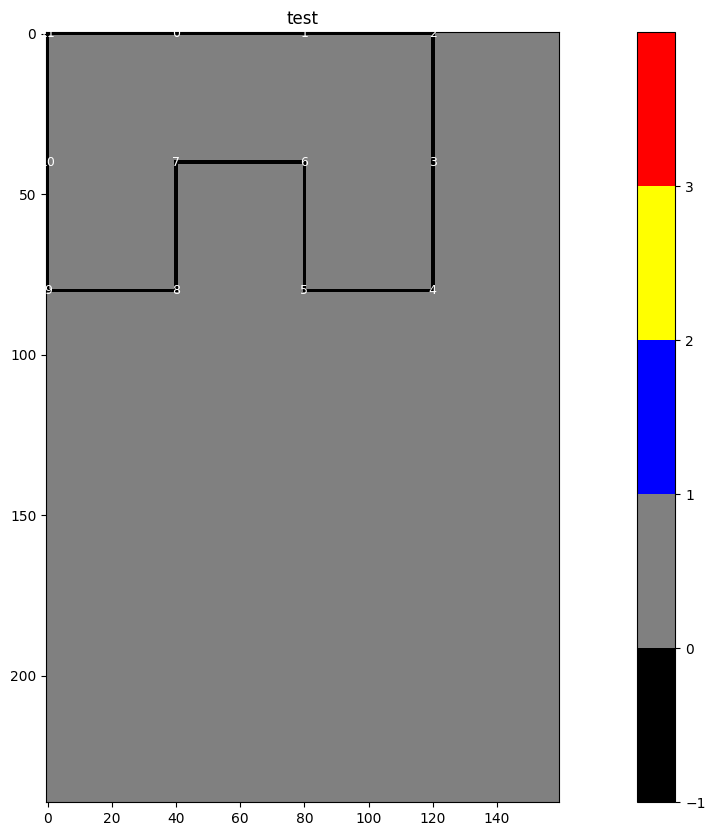

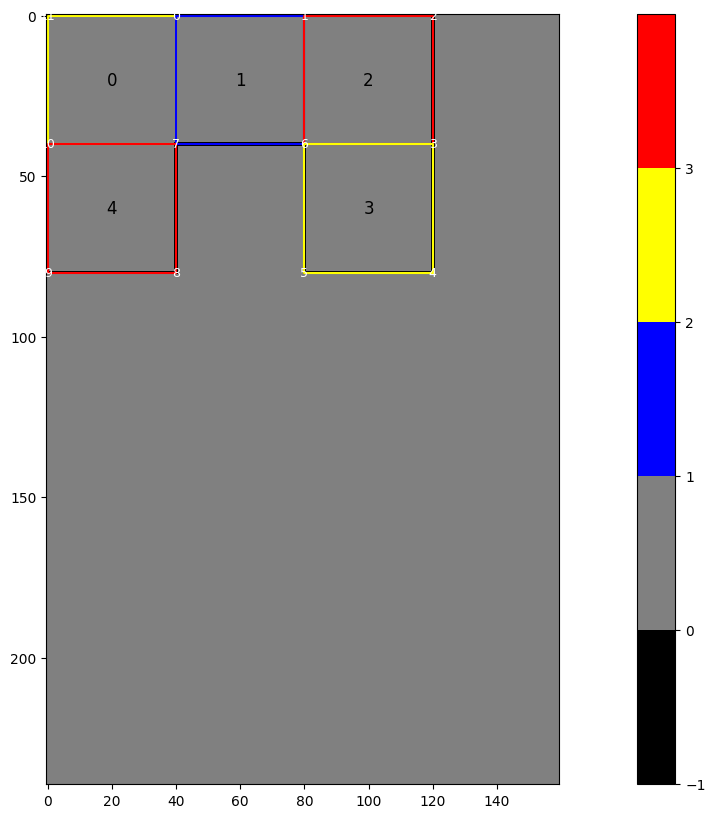

--- 4 ---
insert 7 -> 0 at 1, color 3 pipe_id 20
mix 7 {16, 20}
--- 0 ---
--- 1 ---
--- 2 ---
insert 6 -> 7 at 1, color 3 pipe_id 21
mix 6 {10, 21}
mix 7 {20, 21}
--- 3 ---
insert 3 -> 2 at 1, color 2 pipe_id 22
insert 2 -> 1 at 1, color 2 pipe_id 23
insert 1 -> 0 at 1, color 2 pipe_id 24
mix 1 {24, 23}
mix 2 {22, 23}
mix 3 {12, 22}


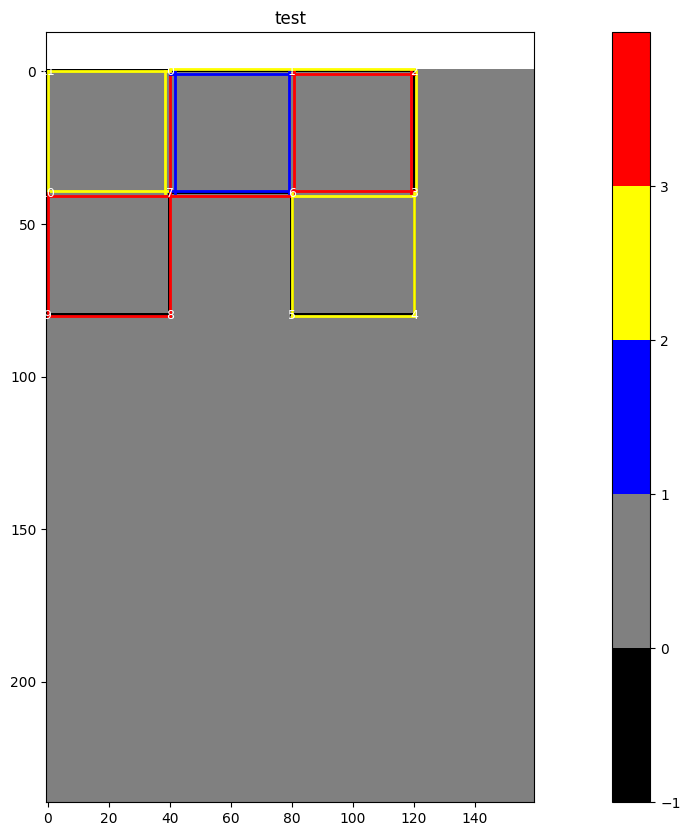

In [3]:
test_1 = {
    'SEG_PTS': [
        [ 0,  40],
        [ 0,  80],
        [ 0, 120],
        [40, 120],
        [80, 120],
        [80,  80],
        [40,  80],
        [40,  40],
        [80,  40],
        [80,   0],
        [40,   0],
        [ 0,   0]],
    'CAC_REGIONS_FAKE': [
        CacRegion([7, 0, 11, 10], 2),
        CacRegion([6, 1,  0,  7], 1),
        CacRegion([3, 2,  1,  6], 3),
        CacRegion([4, 3,  6,  5], 2),
        CacRegion([8, 7, 10,  9], 3),],
    'SEG_EDGE_PT_NUM': 12,
    'DESTINATION_PT': 0,
    'CMAP': {-1: 'black', 0: 'grey', 1: 'blue', 2: 'yellow', 3: 'red'}
}

load_and_test(test_1)

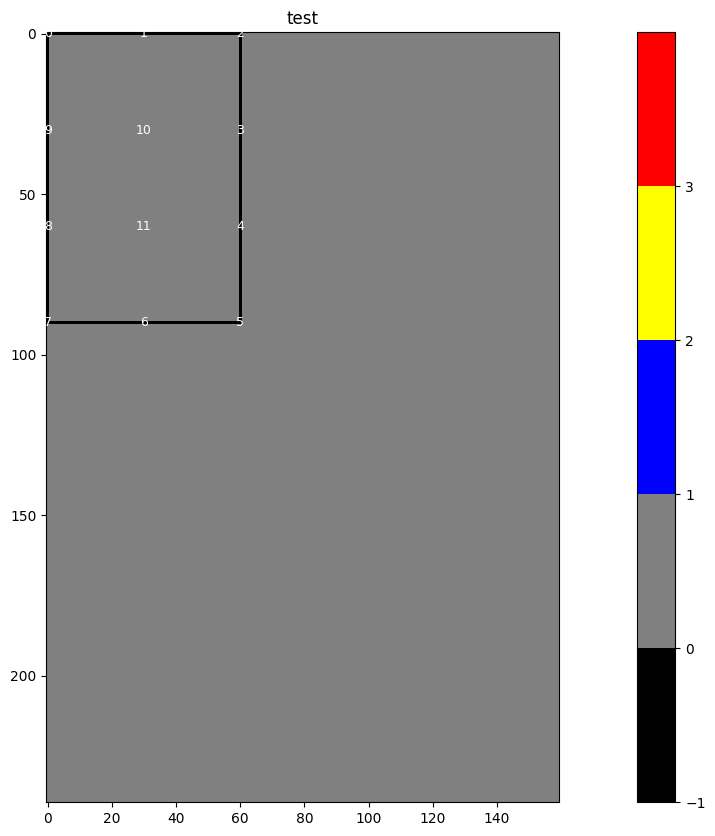

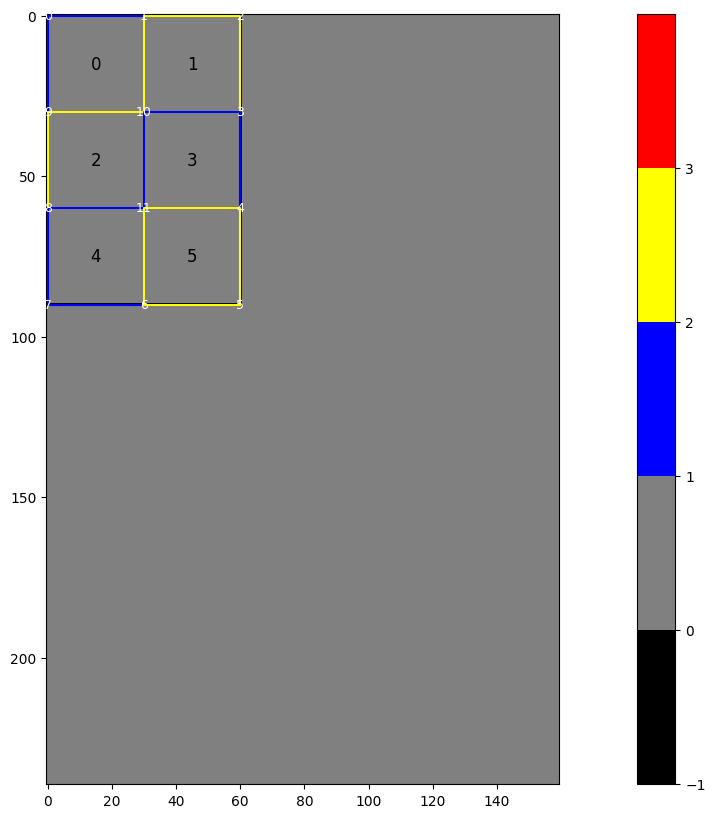

--- 4 ---
mix 3 {12, 13}
mix 4 {12, 15}
mix 9 {2, 3}
mix 10 {3, 13}
mix 11 {16, 15}
--- 5 ---
insert 4 -> 3 at 1, color 2 pipe_id 24
insert 1 -> 0 at 1, color 2 pipe_id 25
mix 1 {25, 5}
mix 2 {4, 5}
mix 3 {24, 4}
mix 4 {24, 20}
--- 0 ---
--- 1 ---
mix 1 {25, 5}
--- 2 ---
insert 9 -> 0 at 0, color 2 pipe_id 26
mix 9 {10, 26}
--- 3 ---
mix 9 {2, 3}
mix 10 {3, 13}


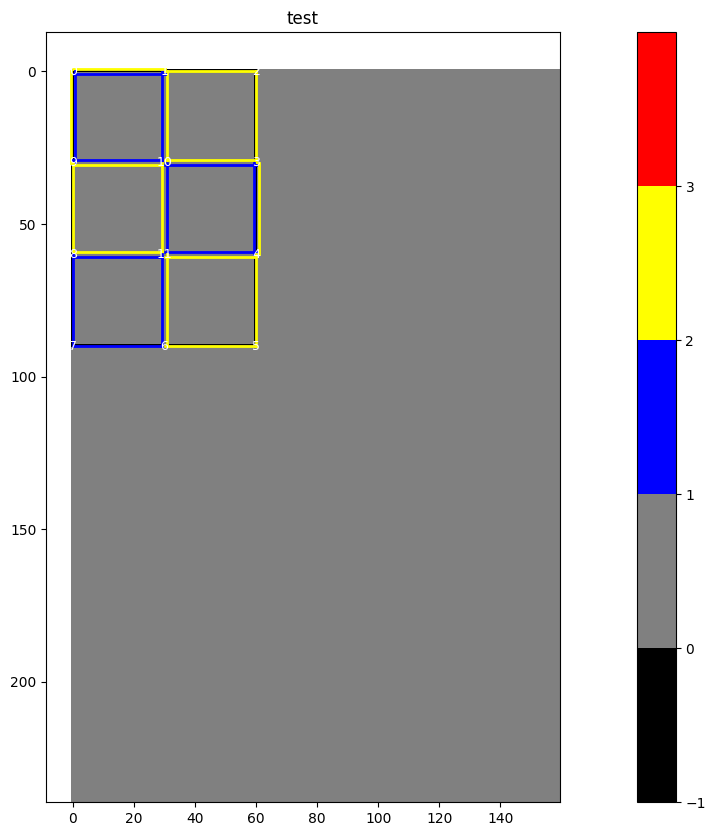

In [5]:
test_2 = {
    'SEG_PTS': [
    [0, 0], [0, 30], [0, 60], [30, 60], [60, 60], [90, 60],
    [90, 30], [90, 0], [60, 0], [30, 0], [30, 30], [60, 30]
    ],
    'CAC_REGIONS_FAKE': [
    CacRegion([10, 1, 0, 9], 1),
    CacRegion([3, 2, 1, 10], 2),
    CacRegion([11, 10, 9, 8], 2),
    CacRegion([4, 3, 10, 11], 1),
    CacRegion([6, 11, 8, 7], 1),
    CacRegion([5, 4, 11, 6], 2),
    ],
    'SEG_EDGE_PT_NUM': 10,
    'DESTINATION_PT': 0,
    'CMAP': {-1: 'black', 0: 'grey', 1: 'blue', 2: 'yellow', 3: 'red'}
}

load_and_test(test_2)

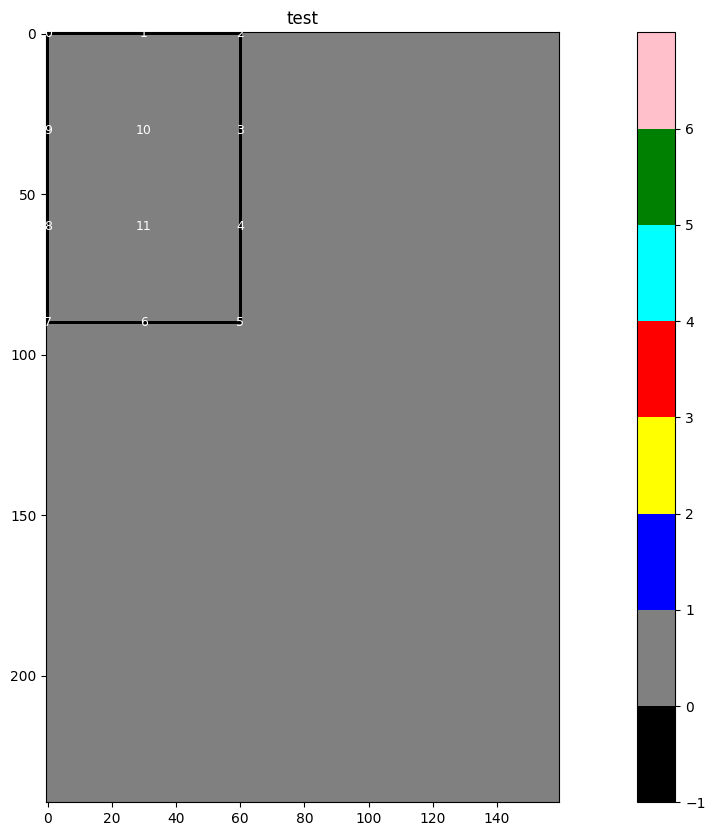

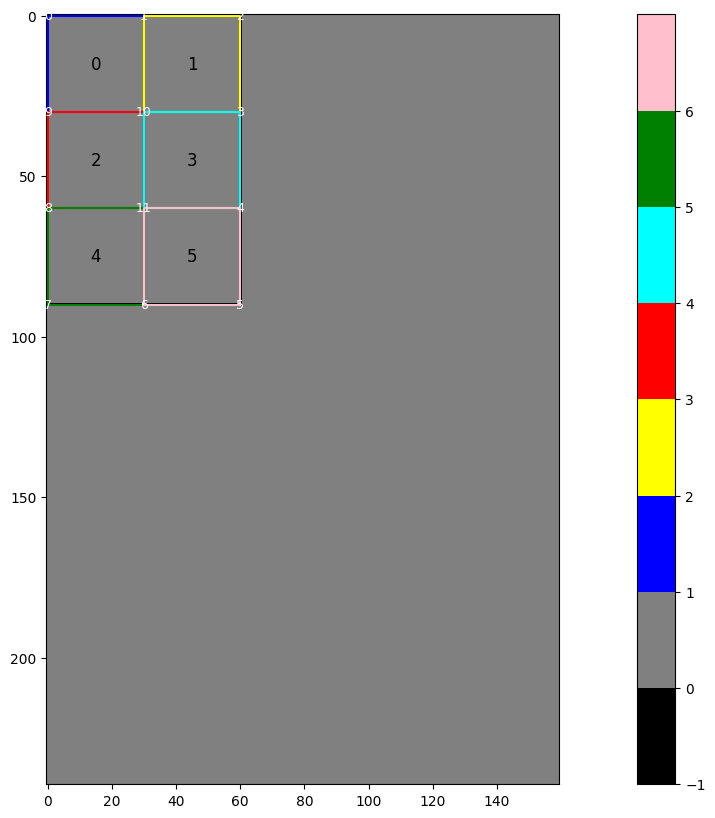

--- 4 ---
insert 8 -> 9 at 1, color 5 pipe_id 24
insert 9 -> 0 at 0, color 5 pipe_id 25
mix 8 {24, 18}
mix 9 {24, 25}
--- 5 ---
insert 11 -> 8 at 1, color 6 pipe_id 26
insert 8 -> 9 at 1, color 6 pipe_id 27
insert 9 -> 0 at 1, color 6 pipe_id 28
mix 8 {26, 27}
mix 9 {27, 28}
mix 11 {26, 21}
--- 0 ---
--- 1 ---
insert 1 -> 0 at 1, color 2 pipe_id 29
mix 1 {29, 5}
--- 2 ---
insert 9 -> 0 at 2, color 3 pipe_id 30
mix 9 {10, 30}
--- 3 ---
insert 10 -> 9 at 1, color 4 pipe_id 31
insert 9 -> 0 at 3, color 4 pipe_id 32
mix 9 {32, 31}
mix 10 {13, 31}


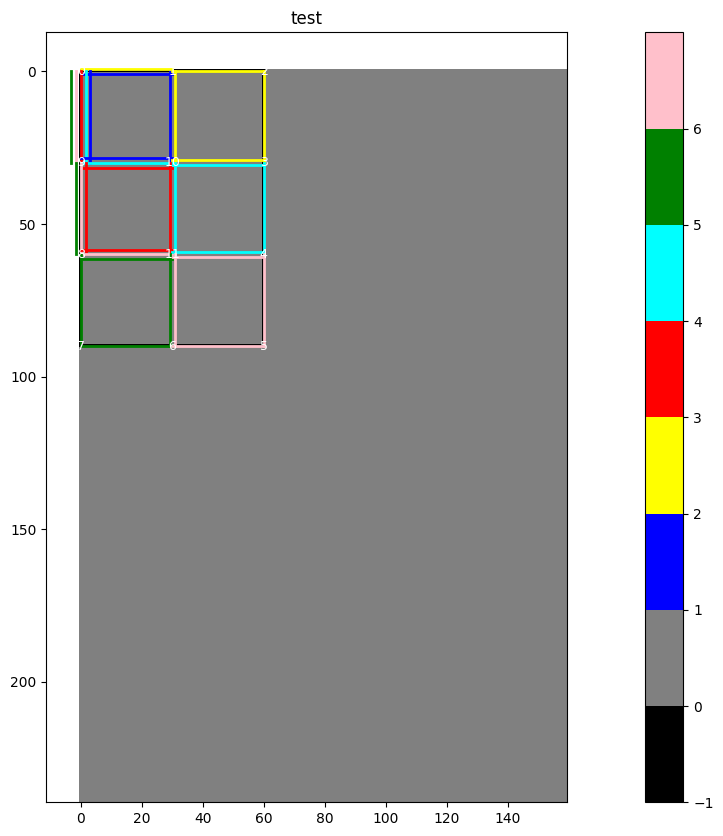

In [8]:
test_3 = {
    'SEG_PTS': [
    [0, 0], [0, 30], [0, 60], [30, 60], [60, 60], [90, 60],
    [90, 30], [90, 0], [60, 0], [30, 0], [30, 30], [60, 30]
    ],
    'CAC_REGIONS_FAKE': [
    CacRegion([10, 1, 0, 9], 1),
    CacRegion([3, 2, 1, 10], 2),
    CacRegion([11, 10, 9, 8], 3),
    CacRegion([4, 3, 10, 11], 4),
    CacRegion([6, 11, 8, 7], 5),
    CacRegion([5, 4, 11, 6], 6),
    ],
    'SEG_EDGE_PT_NUM': 10,
    'DESTINATION_PT': 0,
    'CMAP': {-1: 'black', 0: 'grey', 1: 'blue', 2: 'yellow', 3: 'red', 4: 'cyan', 5: 'green', 6: 'pink'}
}

load_and_test(test_3)

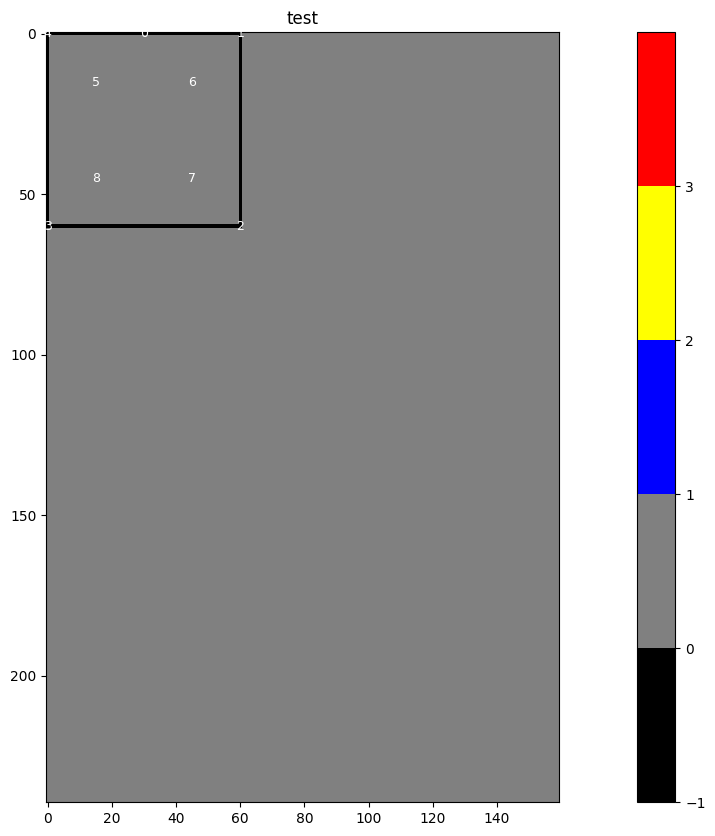

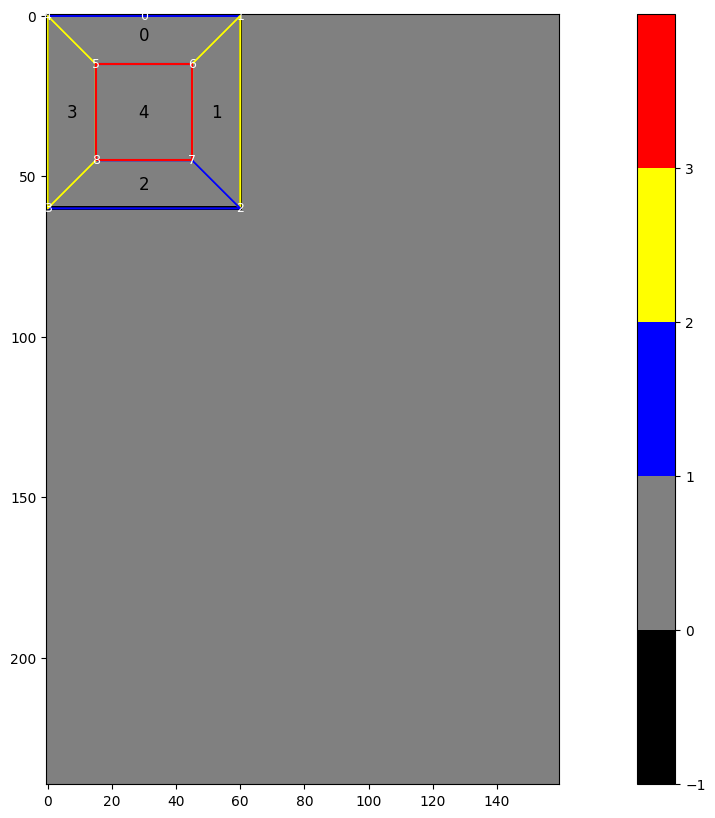

--- 2 ---
insert 3 -> 4 at 1, color 1 pipe_id 21
mix 3 {10, 21}
mix 4 {3, 21}
--- 3 ---


AssertionError: 

In [12]:
test_4 = {
    'SEG_PTS': [
    [0, 30], [0, 60], [60, 60], [60, 0], [0, 0], [15, 15], [15, 45], [45, 45], [45, 15]
    ],
    'CAC_REGIONS_FAKE': [
    CacRegion([5, 6, 1, 0, 4], 1),
    CacRegion([7, 2, 1, 6], 2),
    CacRegion([7, 2, 3, 8], 1),
    CacRegion([8, 5, 4, 3], 2),
    CacRegion([5, 6, 7, 8], 3),
    ],
    'SEG_EDGE_PT_NUM': 5,
    'DESTINATION_PT': 0,
    'CMAP': {-1: 'black', 0: 'grey', 1: 'blue', 2: 'yellow', 3: 'red'}
}

load_and_test(test_4)